  Age Group  Observed  Expected  (O-E)^2 / E
0       <18       121     100.0        4.410
1     18–35       288     150.0      126.960
2       >35        91     250.0      101.124

Chi-Square Statistic: 232.494
Critical Value (0.05): 5.991464547107979
P-value: 3.270162712012095e-51
Conclusion: Reject H0: Distribution in 2010 is significantly different from 2000 census.


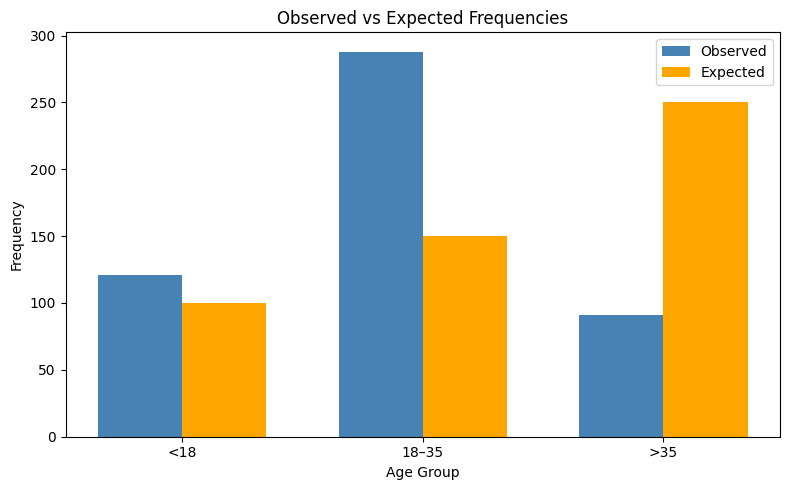

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Observed and expected data
observed = [121, 288, 91]
expected_proportions = [0.20, 0.30, 0.50]
sample_size = 500
expected = [p * sample_size for p in expected_proportions]
age_groups = ["<18", "18–35", ">35"]

# Chi-Square Calculation
chi_square_components = [(o - e)**2 / e for o, e in zip(observed, expected)]
chi_square_statistic = sum(chi_square_components)
df = len(observed) - 1
critical_value = stats.chi2.ppf(0.95, df)
p_value = stats.chi2.sf(chi_square_statistic, df)

# Conclusion
conclusion_text = (
    "Reject H0: Distribution in 2010 is significantly different from 2000 census."
    if chi_square_statistic > critical_value else
    "Fail to reject H0: No significant difference."
)

# Print Summary
summary_df = pd.DataFrame({
    "Age Group": age_groups,
    "Observed": observed,
    "Expected": expected,
    "(O-E)^2 / E": chi_square_components
})
print(summary_df)
print("\nChi-Square Statistic:", chi_square_statistic)
print("Critical Value (0.05):", critical_value)
print("P-value:", p_value)
print("Conclusion:", conclusion_text)

# Plotting the chart
plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(age_groups))

plt.bar(x, observed, width=bar_width, label='Observed', color='steelblue')
plt.bar([i + bar_width for i in x], expected, width=bar_width, label='Expected', color='orange')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Observed vs Expected Frequencies')
plt.xticks([i + bar_width / 2 for i in x], age_groups)
plt.legend()
plt.tight_layout()
plt.show()
